In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
# import the data
df = pd.read_csv("collected data9.6.2019/merged_data.csv", index_col=0)

In [3]:
# calculate total minutes of play time for each player by reversing formula spm * minutes = score
df['minutes'] = df['score']/df['spm']
df['kpm'] = df['kills']/df['minutes']

In [4]:
# through the previous EDA we recall that it's best to eliminate top 1% and bottom 1% of players based on spm
upper = np.percentile(df.spm, 99)
lower = np.percentile(df.spm, 1)

df = df[(df['spm'] >= lower) & (df['spm'] <= upper)]

In [5]:
# Create arrays for features and target variable
y = df['spm'].values
X = df['kpm'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (37081,)
Dimensions of X before reshaping: (37081,)
Dimensions of y after reshaping: (37081, 1)
Dimensions of X after reshaping: (37081, 1)


In [6]:
# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X, y))

0.004903279484539835


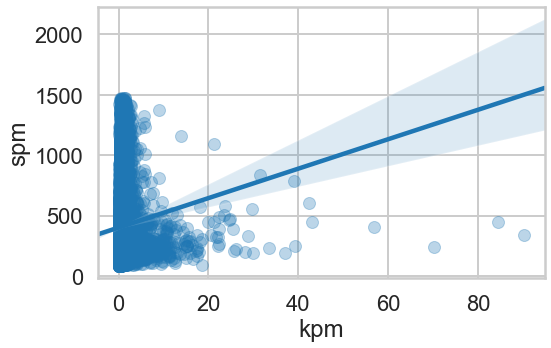

In [7]:
# Plot regression line
_ = plt.figure(figsize=(8,5))
_ = sns.regplot('kpm', 'spm', data=df, fit_reg = True, scatter_kws={'alpha':0.3})

**Conclusion**: The R^2 and plot could signify that there are multiple factors that contribute to a high score per minute(spm). Kills per minute alone does not explain why a player is able to obtain a high score per minute(spm).

<hr>

In [8]:
# remove columns with duplicate values along with rankings, id, unlocks, medals
x_cols = df.drop(['player_id','time','ladder_rank','score','skill',
                  'battle_rank','scores.rankScore','extra.spm','extra.gspm',
                  'extra.medals','extra.ribbonsUnique','extra.medalsUnique',
                  'extra.ribbons','extra.ribpr','scores.unlock'],axis=1)
x_cols.shape

(37081, 247)

In [9]:
import statsmodels.api as sm

X = x_cols.drop(['spm'],axis = 1)
y = x_cols.spm

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    spm   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              2502.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:30:42   Log-Likelihood:                     -2.2826e+05
No. Observations:               37081   AIC:                                  4.570e+05
Df Residuals:                   36839   BIC:                                  4.591e+05
Df Model:                         242                                                  
Covariance Type:            nonrobust                                                  
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------

In [10]:
# Using the OLS model, we can extract variables that are significant to predicting spm
df2 = pd.DataFrame(model.pvalues[model.pvalues < 0.01])
sig_var = list(df2.index)
len(sig_var)

91

In [11]:
print(list(sig_var))

['avengerKills', 'deaths', 'extra.accuracy', 'extra.hkp', 'extra.kdr', 'extra.khp', 'extra.sfpm', 'extra.vehKillsP', 'extra.vehTimeP', 'extra.weaKillsP', 'extra.weaKpm', 'extra.weaTimeP', 'extra.wlr', 'flagDefend', 'heals', 'killAssists', 'killStreakBonus', 'kits.assault.spm', 'kits.assault.stars', 'kits.assault.time', 'kits.commander.spm', 'kits.engineer.spm', 'kits.engineer.stars', 'kits.engineer.time', 'kits.recon.spm', 'kits.recon.stars', 'kits.recon.time', 'kits.support.spm', 'kits.support.stars', 'kits.support.time', 'longestHeadshot', 'numLosses', 'numRounds', 'numWins', 'resupplies', 'scores.award', 'scores.general', 'scores.score', 'scores.totalScore', 'Domination_score', 'GADGET_extra.accuracy', 'GADGET_extra.sfpm', 'SNIPER RIFLE_extra.accuracy', 'SNIPER RIFLE_extra.hkp', 'SNIPER RIFLE_stat.score', 'PDW_extra.accuracy', 'PDW_extra.hkp', 'PDW_extra.kpm', 'PDW_extra.sfpm', 'PDW_extra.spm', 'PDW_stat.score', 'CARBINE_extra.hkp', 'CARBINE_extra.kpm', 'CARBINE_extra.sfpm', 'CARBIN

In [12]:
sig_var.append('spm')

In [13]:
x_new = x_cols[sig_var]
x_new = x_new.reset_index(drop=True)

In [14]:
x_new.shape

(37081, 92)

In [15]:
X = x_new.drop(['spm'],axis = 1)
y = x_new.spm

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    spm   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              6384.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:30:43   Log-Likelihood:                     -2.2925e+05
No. Observations:               37081   AIC:                                  4.587e+05
Df Residuals:                   36991   BIC:                                  4.594e+05
Df Model:                          90                                                  
Covariance Type:            nonrobust                                                  
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------

**Conclusion**: Based on the OLS, model, we can conclude that there are a significant amount of variables that contribute to a player's high spm score, these include nearly all weapons and kit uses, along with Air Jet, Tank and Helicopter usage. However, 91 features are still too complicated to explain this model, in the code, below, we use PCA to reduce our dimensions.

<hr>

In [16]:
# since we have 92 columns/dimensions, we should consider using PCA to reduce dimensions
from sklearn.decomposition import PCA

In [17]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_new)

In [18]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

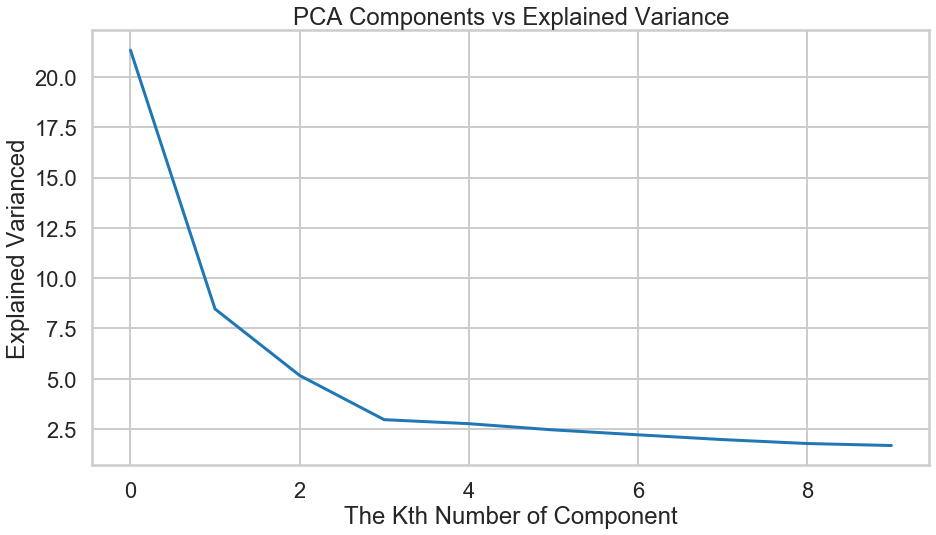

In [19]:
# Plot the explained variance by each component
_ = plt.figure(figsize=(15,8))
_ = plt.title('PCA Components vs Explained Variance')
_ = plt.plot(pca.explained_variance_[:10])
_ = plt.xlabel('The Kth Number of Component')
_ = plt.ylabel('Explained Varianced')
_ = plt.show()

In [20]:
# create model and set components to 3, then fit model
pca = sklearn.decomposition.PCA(n_components=8, random_state=0)
x_new['pc1'] = pca.fit_transform(x_new)[:,0]
x_new['pc2'] = pca.fit_transform(x_new)[:,1]
x_new['pc3'] = pca.fit_transform(x_new)[:,2]
x_new['pc4'] = pca.fit_transform(x_new)[:,3]
x_new['pc5'] = pca.fit_transform(x_new)[:,4]
x_new['pc6'] = pca.fit_transform(x_new)[:,5]
x_new['pc7'] = pca.fit_transform(x_new)[:,6]
x_new['pc8'] = pca.fit_transform(x_new)[:,7]

In [21]:
# move x,y,z to the front
#x_new = x_new[ ['z'] + [ col for col in x_new.columns if col != 'z' ] ]
#x_new = x_new[ ['y'] + [ col for col in x_new.columns if col != 'y' ] ]
#x_new = x_new[ ['x'] + [ col for col in x_new.columns if col != 'x' ] ]

In [22]:
x_new.head()

,avengerKills,deaths,extra.accuracy,extra.hkp,extra.kdr,extra.khp,extra.sfpm,extra.vehKillsP,extra.vehTimeP,extra.weaKillsP,...,kpm,spm,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,62235,286403,11,15,2,27,42,6,7,92,...,1.368540,941.95,5.969639e+08,-8.439843e+05,2.727433e+07,2.646258e+06,-1.465301e+07,3.498052e+07,5.246323e+07,1.406991e+06
1,51888,131168,11,14,3,16,72,20,21,79,...,1.384666,939.07,4.957584e+08,1.048668e+06,-2.328475e+07,-6.966198e+06,1.285365e+07,-4.436946e+06,3.303555e+06,1.517513e+06
2,51266,166087,17,21,3,18,53,23,20,76,...,1.737936,971.45,4.982960e+08,5.181235e+05,-1.693180e+07,5.683155e+06,2.094715e+05,7.360406e+06,-9.630978e+06,-1.892635e+07
3,51743,312395,14,11,1,19,56,22,24,77,...,1.647379,976.21,4.539191e+08,-2.743871e+05,1.161428e+07,6.234583e+06,2.058098e+06,-8.436610e+06,1.005854e+06,2.610134e+05
4,30049,132163,11,9,3,12,64,58,38,41,...,0.958514,660.64,4.535830e+08,-2.033513e+05,1.030291e+06,1.114160e+07,-8.221573e+05,3.997949e+06,-1.928748e+06,1.208913e+06


In [23]:
x_tmp = x_new[['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','spm']]

In [24]:
x_tmp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,spm
0,5.969639e+08,-8.439843e+05,2.727433e+07,2.646258e+06,-1.465301e+07,3.498052e+07,5.246323e+07,1.406991e+06,941.95
1,4.957584e+08,1.048668e+06,-2.328475e+07,-6.966198e+06,1.285365e+07,-4.436946e+06,3.303555e+06,1.517513e+06,939.07
2,4.982960e+08,5.181235e+05,-1.693180e+07,5.683155e+06,2.094715e+05,7.360406e+06,-9.630978e+06,-1.892635e+07,971.45
3,4.539191e+08,-2.743871e+05,1.161428e+07,6.234583e+06,2.058098e+06,-8.436610e+06,1.005854e+06,2.610134e+05,976.21
4,4.535830e+08,-2.033513e+05,1.030291e+06,1.114160e+07,-8.221573e+05,3.997949e+06,-1.928748e+06,1.208913e+06,660.64
...,...,...,...,...,...,...,...,...,...
37076,-1.151925e+07,-1.442159e+04,1.431440e+05,2.943601e+05,1.168217e+05,-3.911165e+04,5.638476e+04,-9.076511e+03,190.96
37077,-1.105941e+07,-1.452726e+04,1.151347e+05,2.231818e+05,8.126040e+04,-2.427735e+04,3.088353e+04,-2.340111e+04,113.90
37078,-1.089903e+07,-1.430093e+04,1.487103e+05,1.859023e+05,1.136104e+05,-2.613755e+04,3.680997e+04,-2.978456e+03,149.38
37079,-1.151665e+07,-1.436277e+04,1.413763e+05,2.955132e+05,1.166043e+05,-3.953807e+04,5.661919e+04,-9.763417e+03,372.53


In [25]:
X = x_tmp.drop(['spm'],axis = 1)
y = x_tmp.spm

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    spm   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.069
Method:                 Least Squares   F-statistic:                              346.6
Date:                Sun, 03 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:31:21   Log-Likelihood:                     -2.7992e+05
No. Observations:               37081   AIC:                                  5.599e+05
Df Residuals:                   37073   BIC:                                  5.599e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------